#  Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).They ran a campaign last year for liability customers showing a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

1. Read the column description and ensure you understand each attribute well

2. Study the data distribution in each attribute, share your findings. (5 points)

3. Get the target column distribution. Your comments

4. Split the data into training and test set in the ratio of 70:30 respectively

5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer      buying personal loans (15 points)

6. Print the confusion matrix for all the above models (5 points)

7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

# **Study the data distribution in each attribute, share your findings.**

In [52]:
#Importing all the necessary libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore

In [4]:
thera_df=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [7]:
thera_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
thera_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
#no null values

**Found some values in the dataset where ['Experience'] was negative(-1,-2,-3). I have replaced them with median
in the next step**

In [28]:
dfposExp = thera_df.loc[thera_df['Experience'] >0]
mask = thera_df.Experience < 0
column_name = 'Experience'
mylist = thera_df.loc[mask]['ID'].tolist()

In [29]:
for id in mylist:
    age = v.loc[np.where(thera_df['ID']==id)]["Age"].tolist()[0]
    education = v.loc[np.where(thera_df['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfposExp[(dfposExp.Age == age) & (dfposExp.Education == education)]
    exp = df_filtered['Experience'].median()
    thera_df.loc[thera_df.loc[np.where(thera_df['ID']==id)].index, 'Experience'] = exp

In [31]:
np.where(thera_df['Experience']<0)

(array([], dtype=int64),)

In [32]:
thera_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


C:\Users\user\Kavyal\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Kavyal\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0


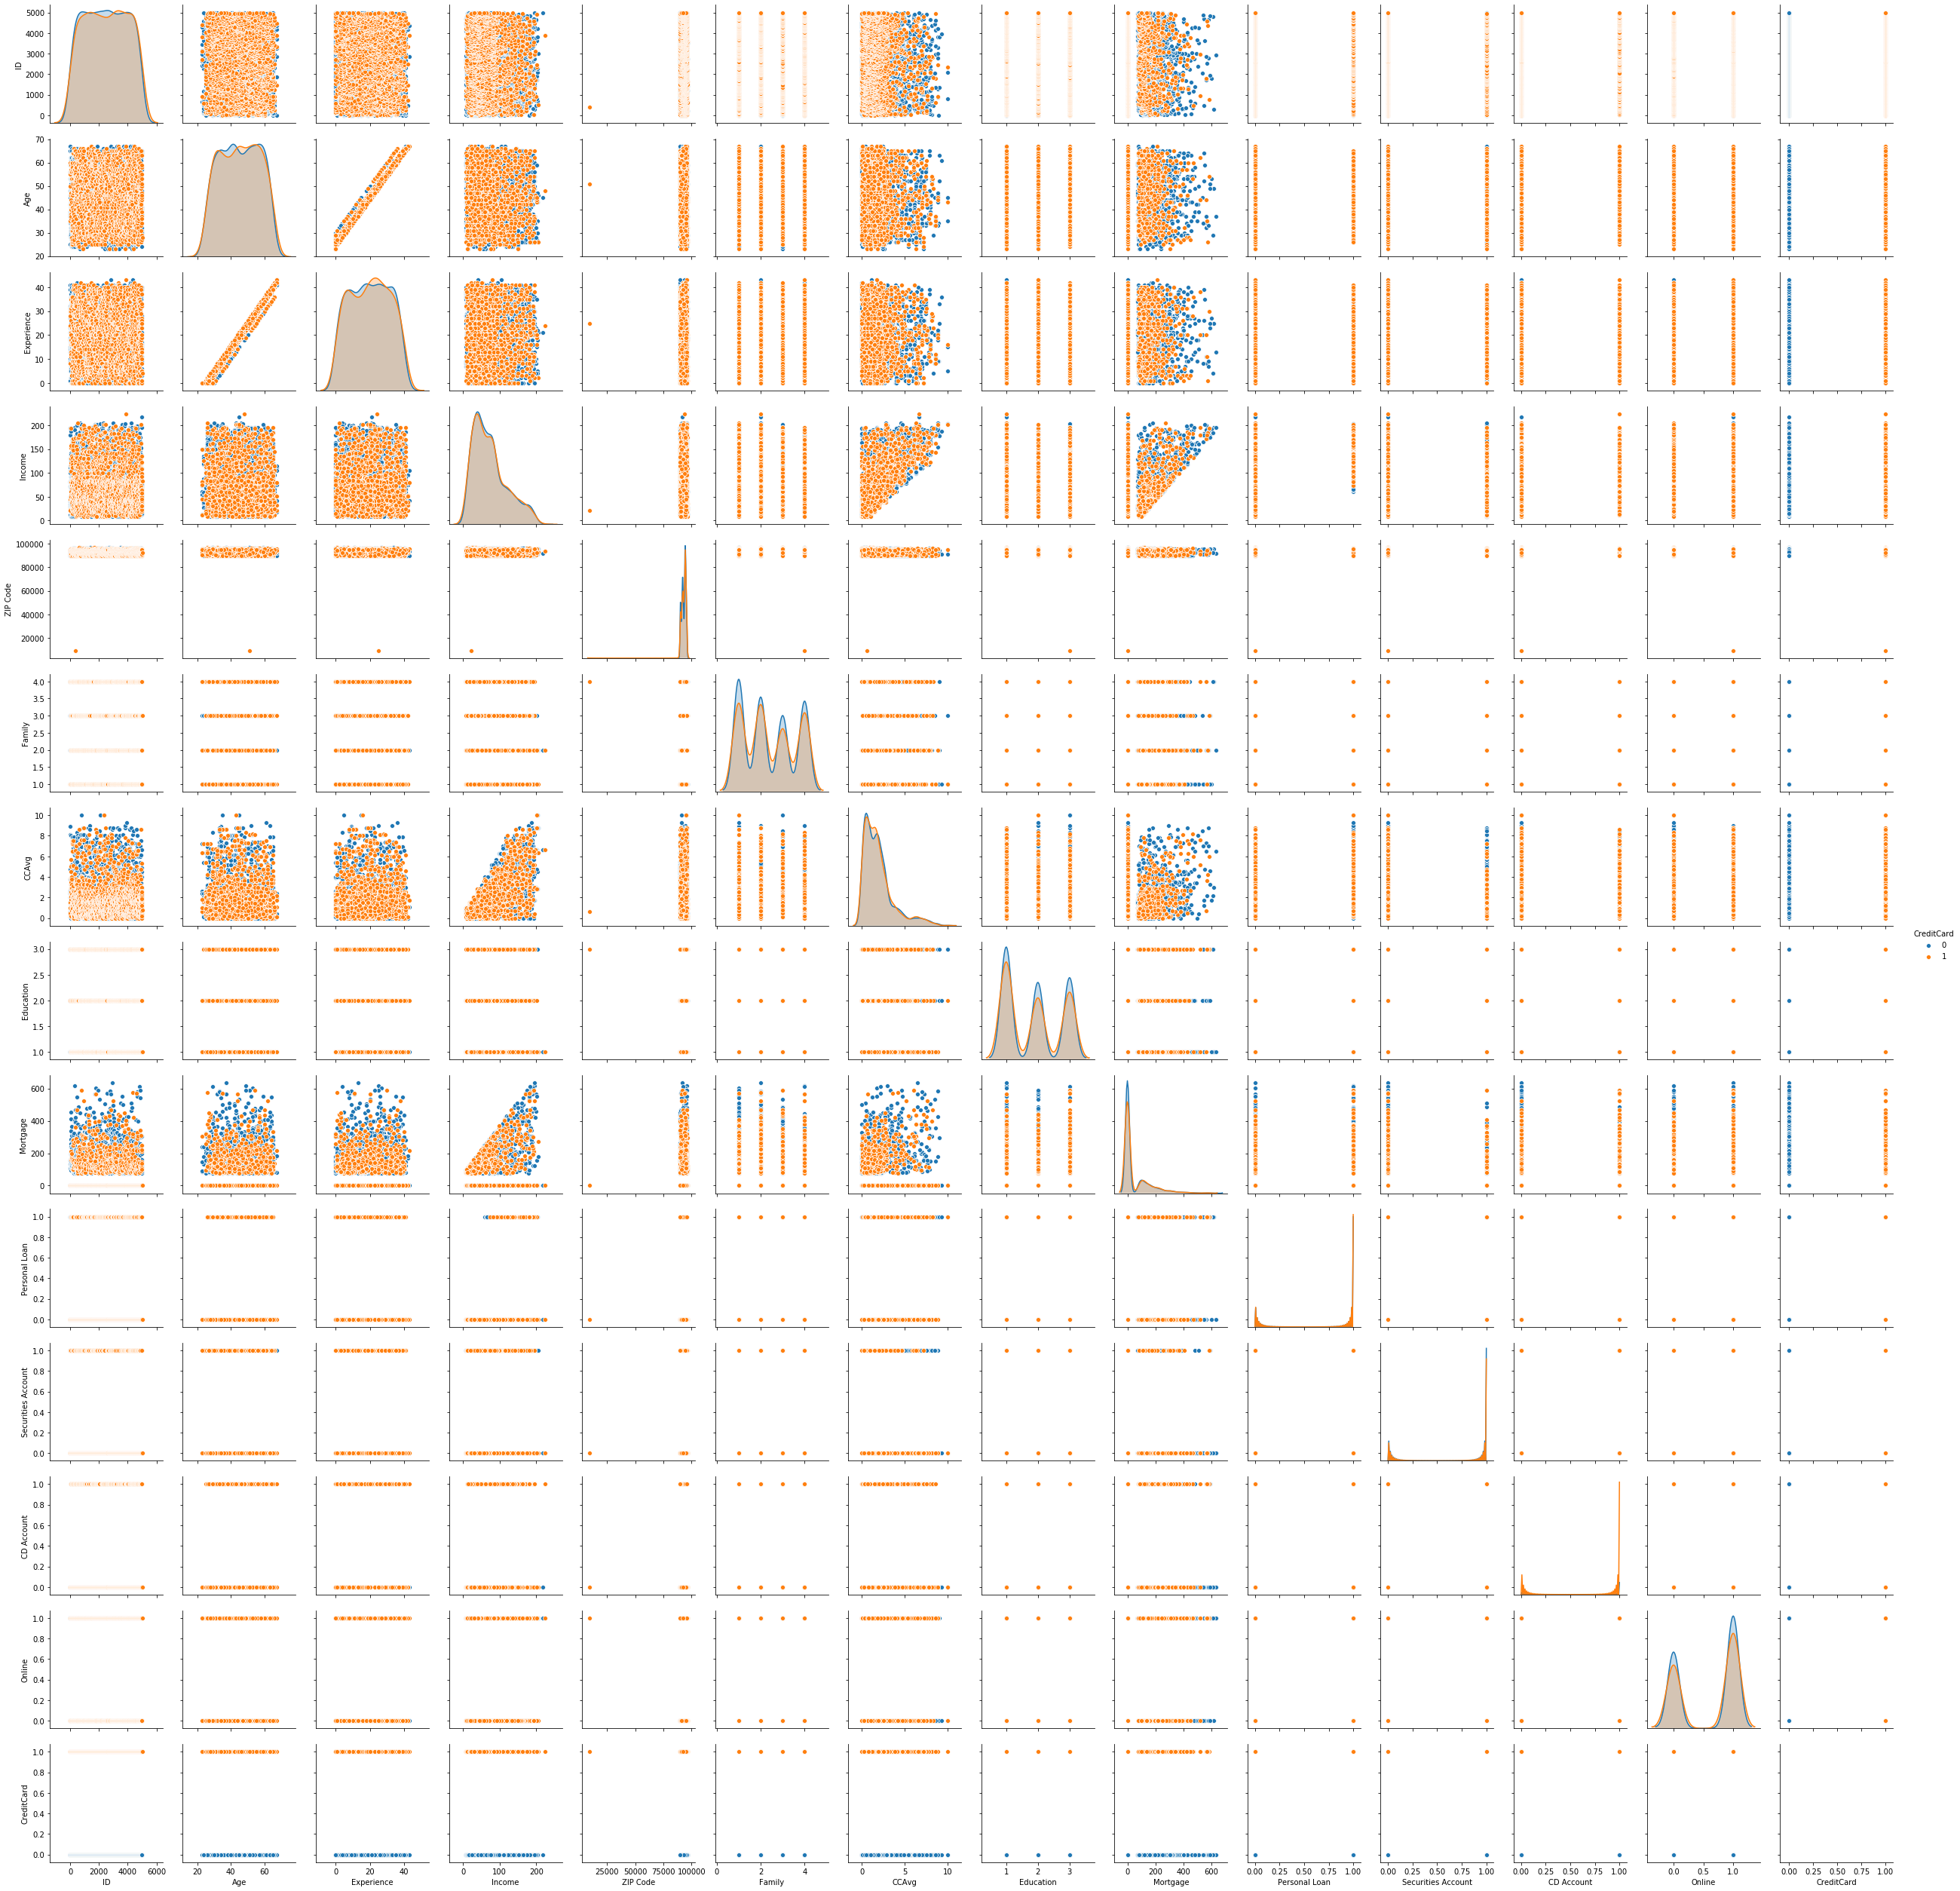

In [26]:
plt = sns.pairplot(thera_df, hue='CreditCard')
thera_df.head(1)

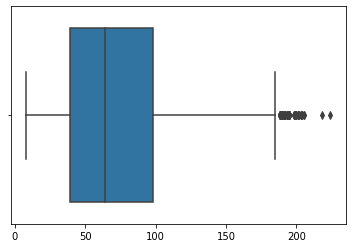

In [14]:

plt = sns.boxplot(thera_df[['Income']])#,'Experience','Income','ZIP Code','Family','CCAvg' ,'Education' , 'Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']] )

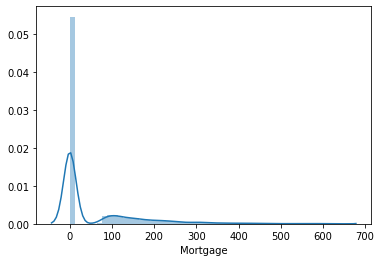

In [18]:
#Mortagage
sns.distplot(a=thera_df['Mortgage'])

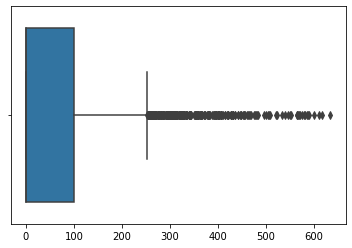

In [20]:

plt = sns.boxplot(thera_df[['Mortgage']])

Our DataSet has highly skewed representation of the Mortgage attribute. Significant outliers of people who have a very high mortgage. And high representation of people who have zero mortgage. 

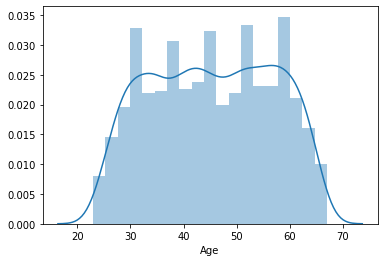

In [21]:
sns.distplot(a=thera_df['Age'])

age attribute has a Multi-modal distribution. 

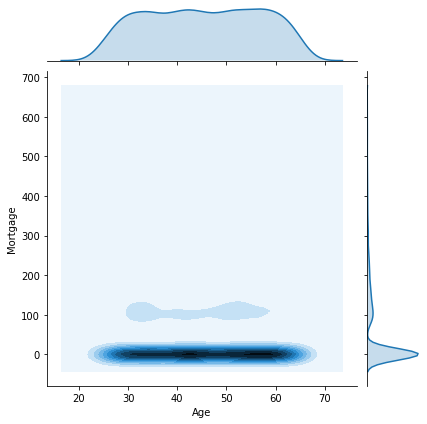

In [23]:
sns.jointplot("Age", "Mortgage", data=thera_df, kind='kde')

**Most of the customers age fall in the age range of 30 to 60 yrs and their experience falls in the range of 5 to 35 years and most earn an income between 10K to 100K.**



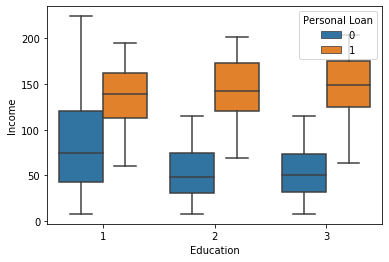

In [34]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=thera_df)


The box plots show that those with education level 1 have higher incomes. But customers who go for personal loans have the same income distribution regardless of the education level.



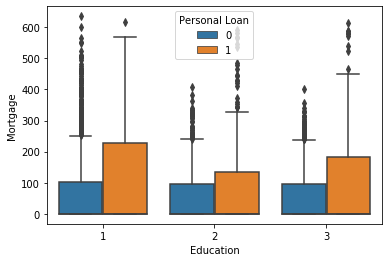

In [36]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=thera_df)


Customers who taken loan also have higher mortgages.



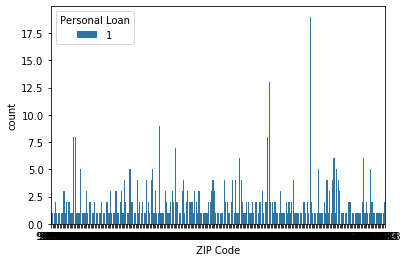

In [41]:
sns.countplot(x="ZIP Code", data=thera_df.loc[thera_df["Personal Loan"]==1], hue ="Personal Loan",orient ='v')


In [43]:
zipcode_top5 = thera_df.loc[thera_df["Personal Loan"]==1]['ZIP Code'].value_counts().head(5)
zipcode_top5

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIP Code, dtype: int64

Top 5 Locations who prior personal loan.



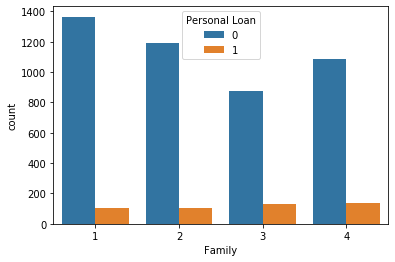

In [45]:
sns.countplot(x="Family", data=thera_df,hue="Personal Loan")

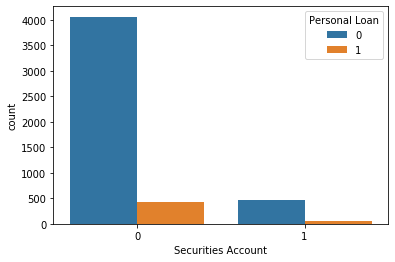

In [47]:
sns.countplot(x="Securities Account", data=thera_df,hue="Personal Loan")

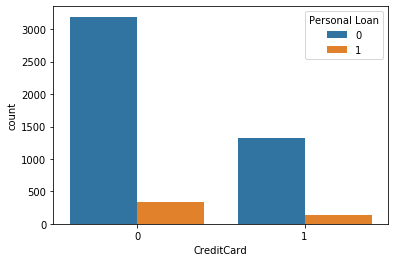

In [49]:
sns.countplot(x="CreditCard", data=thera_df,hue="Personal Loan")


**Correlation with heatmap**

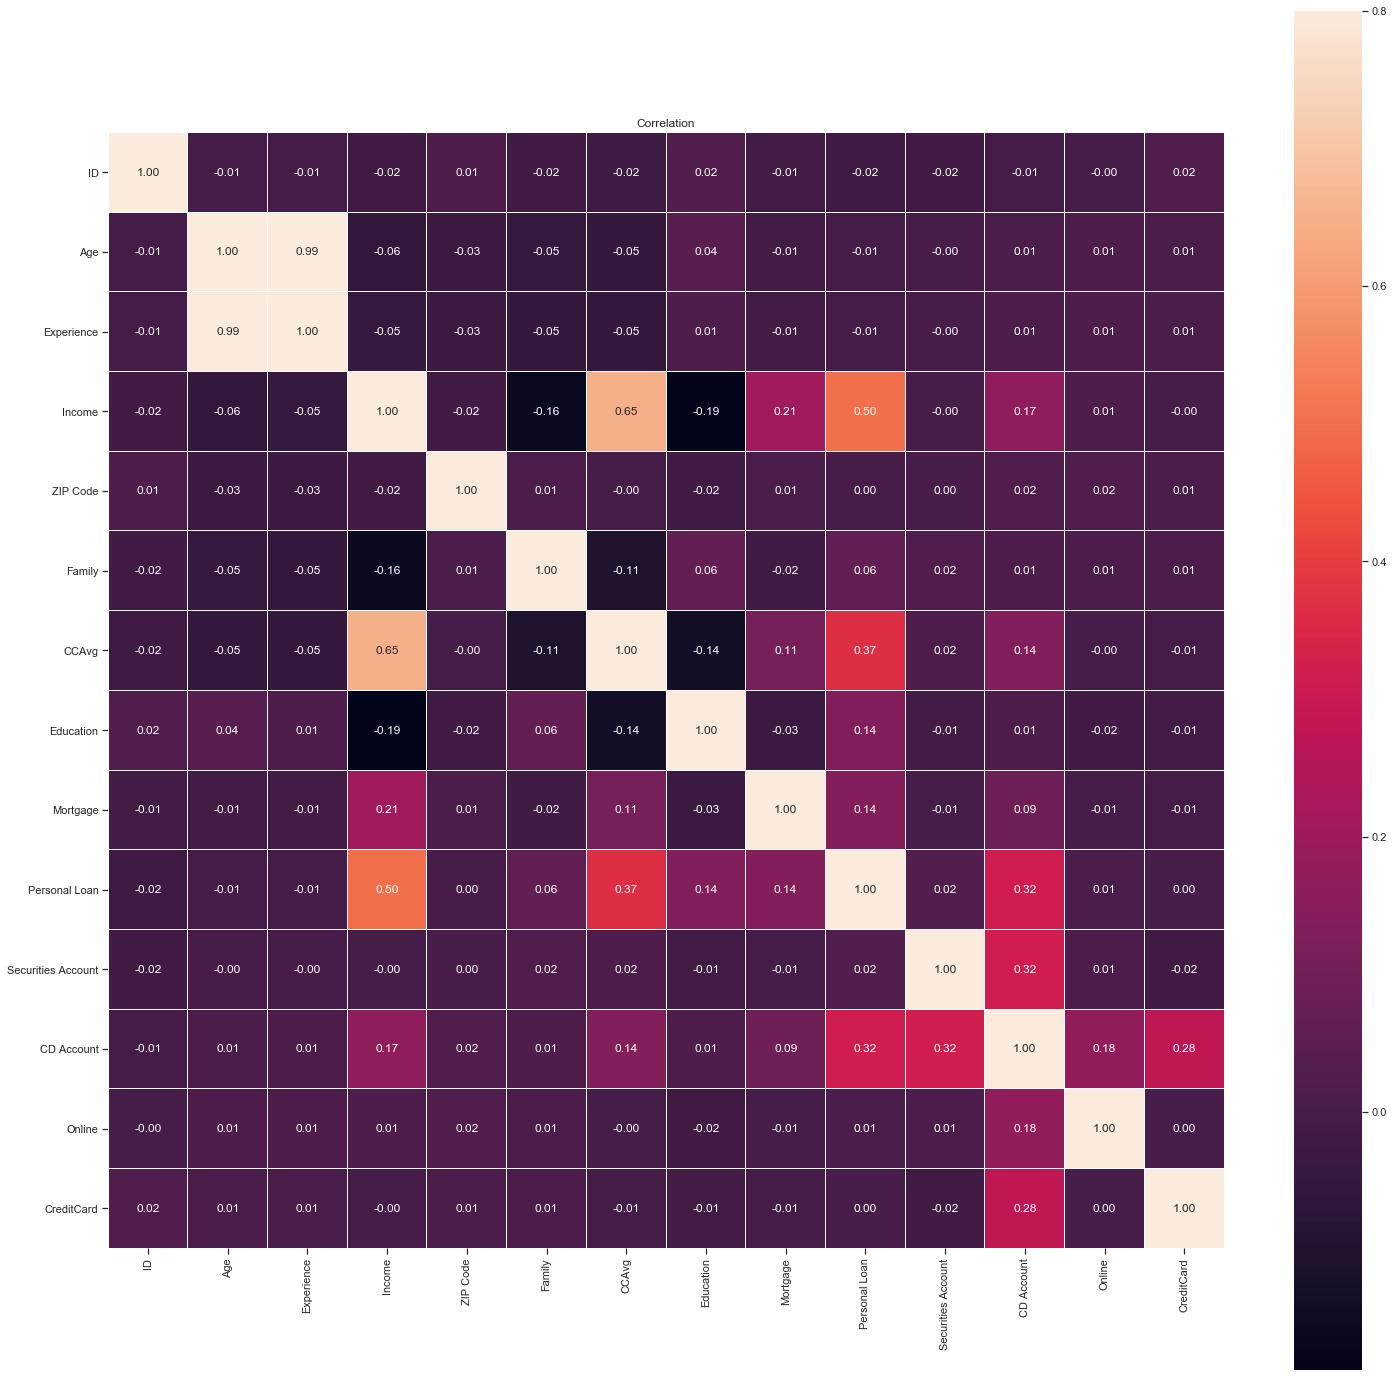

In [55]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(thera_df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

Age and Experience is highly corelated


Income and CCAvg also corelated

**train and Test split**

In [56]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(thera_df.drop(['Experience' ,'ID' ,'CCAvg'], axis=1), test_size=0.3 , random_state=53)

In [57]:
train_set.describe()


,Age,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.458286,73.814571,93176.260286,2.402857,1.890286,57.439714,0.094857,0.106857,0.061143,0.595714,0.296286
std,11.498213,45.987910,1739.659921,1.148576,0.840846,101.949410,0.293059,0.308976,0.239626,0.490823,0.456684
min,23.000000,8.000000,90005.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,92007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,64.000000,93407.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,99.000000,94608.000000,3.000000,3.000000,102.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
test_set.describe()

,Age,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,45.058667,73.680000,93097.069333,2.381333,1.859333,54.303333,0.098667,0.098667,0.058667,0.599333,0.288667
std,11.379875,46.155684,2818.830809,1.145772,0.837465,101.161761,0.298313,0.298313,0.235078,0.490197,0.453294
min,23.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,91768.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,93555.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,95.000000,94608.000000,3.000000,3.000000,97.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,205.000000,96651.000000,4.000000,3.000000,612.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
train_labels = train_set.pop("Personal Loan")
test_labels = test_set.pop("Personal Loan")

## DecisionTreeClassifier


In [66]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3)
dt_model.fit(train_set, train_labels)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
dt_model.score(test_set , test_labels)


0.974

## Naive Bayes


In [68]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.9166666666666666

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(test_labels, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1296,69
Yes,56,79


## RandomForestClassifier

In [70]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

C:\Users\user\Kavyal\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

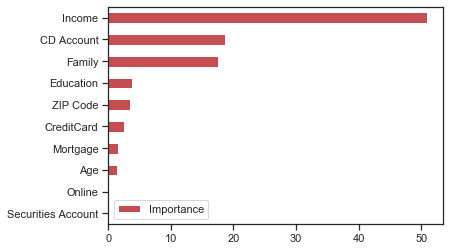

In [71]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [72]:
predicted_random=randomforest_model.predict(test_set)


In [73]:
randomforest_model.score(test_set,test_labels)


0.9246666666666666

## KNeighborsClassifier

In [76]:
train_set_indep = thera_df.drop(['Experience' ,'ID' ,'CCAvg'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_indep_z = train_set_indep.apply(zscore)
train_set_dep = thera_df["Personal Loan"]
X = np.array(train_set_indep_z)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [77]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)

In [78]:
print(acc)


0.9446297531687792


**As infered from the above accuracy scores, Decision Tree classifier gives me higest accuracy scores, Hence I will use that model for my Use Case**